<a href="https://colab.research.google.com/github/vpleshko-lab/ml_information/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/creditcard.csv'
df = pd.read_csv(path)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df['HHMM'] = (
    df['Time'].astype(int)
      .apply(lambda sec: f"{sec//3600:02d}:{(sec%3600)//60:02d}")
)
# якщо HHMM — рядок у форматі “X[д ]HH:MM” або “HH:MM”
def split_hm(s):
    # прибрати дні, якщо вони є
    if 'd' in s:
        _, hm = s.split('d ')
    else:
        hm = s
    h, m = hm.split(':')
    return int(h), int(m)

df[['hours', 'minutes']] = df['HHMM'].apply(lambda s: pd.Series(split_hm(s)))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     284807 non-null  float64
 1   V1       284807 non-null  float64
 2   V2       284807 non-null  float64
 3   V3       284807 non-null  float64
 4   V4       284807 non-null  float64
 5   V5       284807 non-null  float64
 6   V6       284807 non-null  float64
 7   V7       284807 non-null  float64
 8   V8       284807 non-null  float64
 9   V9       284807 non-null  float64
 10  V10      284807 non-null  float64
 11  V11      284807 non-null  float64
 12  V12      284807 non-null  float64
 13  V13      284807 non-null  float64
 14  V14      284807 non-null  float64
 15  V15      284807 non-null  float64
 16  V16      284807 non-null  float64
 17  V17      284807 non-null  float64
 18  V18      284807 non-null  float64
 19  V19      284807 non-null  float64
 20  V20      284807 non-null  

In [ ]:
df['is_class_0'] = (df['Class'] == 0).astype(int)
df['is_class_1'] = (df['Class'] == 1).astype(int)

df['is_class_1'].value_counts()

,count
is_class_1,
0,284315
1,492


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,HHMM,hours,minutes,is_class_0,is_class_1
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,00:00,0,0,1,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,00:00,0,0,1,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,00:00,0,0,1,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,00:00,0,0,1,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,00:00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.250034,0.943651,0.823731,0.77,0,47:59,47,59,1,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.395255,0.068472,-0.053527,24.79,0,47:59,47,59,1,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.087371,0.004455,-0.026561,67.88,0,47:59,47,59,1,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.546668,0.108821,0.104533,10.00,0,47:59,47,59,1,0


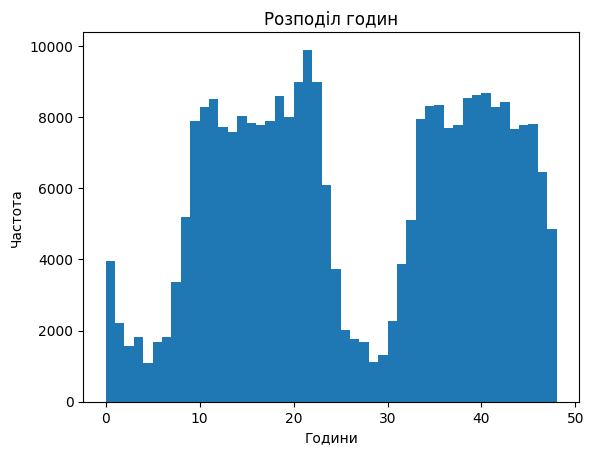

In [35]:
plt.hist(df['hours'], bins=range(df['hours'].min(), df['hours'].max()+2))
plt.xlabel('Години')
plt.ylabel('Частота')
plt.title('Розподіл годин')
plt.show()

In [ ]:
hourly = df.groupby('hours')['Class'].agg(['count', 'sum'])
hourly['fraud_rate'] = hourly['sum'] / hourly['count']
hourly = hourly.reset_index().rename(columns={'count':'transactions', 'sum':'frauds'})

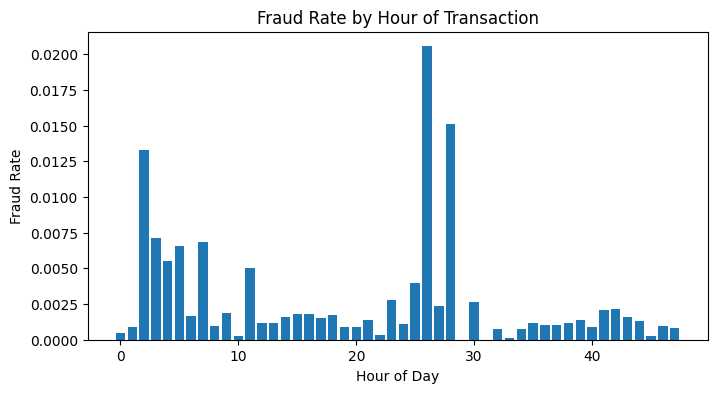

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(hourly['hours'], hourly['fraud_rate'])
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Hour of Transaction')
plt.show()

In [ ]:
df['hour_of_day'] = df['hours'] % 24

df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Class,HHMM,hours,minutes,is_class_0,is_class_1,hour_of_day,hour_sin,hour_cos
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,0,00:00,0,0,1,0,0,0.000000,1.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,0,00:00,0,0,1,0,0,0.000000,1.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,0,00:00,0,0,1,0,0,0.000000,1.000000
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,0,00:00,0,0,1,0,0,0.000000,1.000000
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,0,00:00,0,0,1,0,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.77,0,47:59,47,59,1,0,23,-0.258819,0.965926
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,24.79,0,47:59,47,59,1,0,23,-0.258819,0.965926
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,67.88,0,47:59,47,59,1,0,23,-0.258819,0.965926
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,10.00,0,47:59,47,59,1,0,23,-0.258819,0.965926


In [ ]:
# 1. Створюємо бін по 15‑хвінному інтервалу:
df['bin_15min'] = (df['Time'] // 900).astype(int)

# 2. Обчислюємо для кожного біна кількість транзакцій та суму Amount
#    за допомогою transform — щоб дістати фічі назад у кожний рядок
df['txns_15min']     = df.groupby('bin_15min')['Amount'].transform('count')
df['amount_sum_15min'] = df.groupby('bin_15min')['Amount'].transform('sum')

# Результат:
df[['Time','Amount','bin_15min','txns_15min','amount_sum_15min']].head(15)


,Time,Amount,bin_15min,txns_15min,amount_sum_15min
0,0.0,149.62,0,1155,76296.52
1,0.0,2.69,0,1155,76296.52
2,1.0,378.66,0,1155,76296.52
3,1.0,123.50,0,1155,76296.52
4,2.0,69.99,0,1155,76296.52
5,2.0,3.67,0,1155,76296.52
6,4.0,4.99,0,1155,76296.52
7,7.0,40.80,0,1155,76296.52
8,7.0,93.20,0,1155,76296.52
9,9.0,3.68,0,1155,76296.52


In [ ]:
df[['bin_15min','txns_15min','amount_sum_15min']].describe()

,bin_15min,txns_15min,amount_sum_15min
count,284807.000000,284807.000000,284807.000000
mean,104.854386,1837.452475,166481.467821
std,52.758891,514.248031,60749.899449
min,0.000000,178.000000,12238.960000
25%,60.000000,1856.000000,133928.470000
50%,94.000000,1986.000000,185197.660000
75%,154.000000,2110.000000,213785.120000
max,191.000000,3030.000000,266524.040000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'HHMM', 'hours', 'minutes', 'is_class_0', 'is_class_1',
       'hour_of_day', 'hour_sin', 'hour_cos', 'bin_15min', 'txns_15min',
       'amount_sum_15min'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              284807 non-null  float64
 1   V1                284807 non-null  float64
 2   V2                284807 non-null  float64
 3   V3                284807 non-null  float64
 4   V4                284807 non-null  float64
 5   V5                284807 non-null  float64
 6   V6                284807 non-null  float64
 7   V7                284807 non-null  float64
 8   V8                284807 non-null  float64
 9   V9                284807 non-null  float64
 10  V10               284807 non-null  float64
 11  V11               284807 non-null  float64
 12  V12               284807 non-null  float64
 13  V13               284807 non-null  float64
 14  V14               284807 non-null  float64
 15  V15               284807 non-null  float64
 16  V16               28

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Перелік всіх фічей для MLP
candidate_features = (
    [f'V{i}' for i in range(1, 29)] +
    ['Amount', 'hours', 'hour_of_day', 'hour_sin', 'hour_cos',
     'txns_15min', 'amount_sum_15min', 'avg_amount_15min']
)

# 2) Відбираємо тільки ті, що реально є в df
features = [f for f in candidate_features if f in df.columns]
print("Використовуємо фічі:", features)

X = df[features]
y = df['Class']

# 3) Розбиваємо на train/test (80/20) зі стратифікацією за класом
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4) Стандартизуємо (дуже важливо для нейромереж)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Class balance (train):", np.bincount(y_train))
print("Class balance (test) : ", np.bincount(y_test))


Використовуємо фічі: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'hours', 'hour_of_day', 'hour_sin', 'hour_cos', 'txns_15min', 'amount_sum_15min']
Train: (227845, 35) Test: (56962, 35)
Class balance (train): [227451    394]
Class balance (test) :  [56864    98]


In [ ]:
import numpy as np
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix,
    precision_recall_curve, f1_score
)
from sklearn.utils.class_weight import compute_class_weight

# === Припускаємо, що X_train, X_test, y_train, y_test готові ===

# -----------------------------
# 1. Балансування класів
# -----------------------------
# обчислюємо ваги класів
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Class weights:", class_weight_dict)

# -----------------------------
# 2. Архітектура Functional API
# -----------------------------
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name='input_layer')

x = Dense(256, activation='relu', name='dense_1')(inputs)
x = BatchNormalization(name='bn_1')(x)
x = Dropout(0.5, name='dropout_1')(x)

x = Dense(128, activation='relu', name='dense_2')(x)
x = BatchNormalization(name='bn_2')(x)
x = Dropout(0.3, name='dropout_2')(x)

x = Dense(64, activation='relu', name='dense_3')(x)
x = BatchNormalization(name='bn_3')(x)
x = Dropout(0.2, name='dropout_3')(x)

outputs = Dense(1, activation='sigmoid', name='output_layer')(x)

model = Model(inputs=inputs, outputs=outputs, name='fraud_mlp_functional')
model.summary()

# -----------------------------
# 3. Компіляція
# -----------------------------
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['AUC']
)

# -----------------------------
# 4. EarlyStopping
# -----------------------------
es = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# -----------------------------
# 5. Навчання
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=1024,
    callbacks=[es],
    class_weight=class_weight_dict,   # 🎯 важливе балансування
    verbose=2
)

# -----------------------------
# 6. Прогнозування
# -----------------------------
y_pred_prob = model.predict(X_test).ravel()

# -----------------------------
# 7. Підбір порогу за F1 / precision-recall
# -----------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"🔧 Обраний поріг: {best_threshold:.4f}")
print(f"Precision на порозі: {precisions[best_index]:.4f}")
print(f"Recall на порозі: {recalls[best_index]:.4f}")
print(f"F1 на порозі: {f1_scores[best_index]:.4f}")

# -----------------------------
# 8. Остаточні передбачення
# -----------------------------
y_pred = (y_pred_prob >= best_threshold).astype(int)

print("✅ Test ROC AUC:", roc_auc_score(y_test, y_pred_prob).round(4))
print("✅ Classification report:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
print("✅ Confusion Matrix:")
print(cm)


Class weights: {np.int64(0): np.float64(0.5008661206149896), np.int64(1): np.float64(289.14340101522845)}


Model: "fraud_mlp_functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_3 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,225 (204.00 KB)

 Trainable params: 51,329 (200.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
179/179 - 8s - 45ms/step - AUC: 0.9335 - loss: 0.3669 - val_AUC: 0.9595 - val_loss: 0.1576
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


179/179 - 5s - 26ms/step - AUC: 0.9697 - loss: 0.2129 - val_AUC: 0.9724 - val_loss: 0.1067
Epoch 3/50
179/179 - 4s - 24ms/step - AUC: 0.9750 - loss: 0.1897 - val_AUC: 0.9675 - val_loss: 0.0791
Epoch 4/50
179/179 - 6s - 35ms/step - AUC: 0.9809 - loss: 0.1612 - val_AUC: 0.9801 - val_loss: 0.0624
Epoch 5/50
179/179 - 4s - 23ms/step - AUC: 0.9839 - loss: 0.1549 - val_AUC: 0.9718 - val_loss: 0.0796
Epoch 6/50
179/179 - 4s - 22ms/step - AUC: 0.9862 - loss: 0.1417 - val_AUC: 0.9865 - val_loss: 0.0602
Epoch 7/50
179/179 - 5s - 28ms/step - AUC: 0.9859 - loss: 0.1462 - val_AUC: 0.9791 - val_loss: 0.0660
Epoch 8/50
179/179 - 4s - 22ms/step - AUC: 0.9882 - loss: 0.1289 - val_AUC: 0.9871 - val_loss: 0.0509
Epoch 9/50
179/179 - 5s - 28ms/step - AUC: 0.9912 - loss: 0.1174 - val_AUC: 0.9804 - val_loss: 0.0434
Epoch 10/50
179/179 - 5s - 27ms/step - AUC: 0.9941 - loss: 0.1013 - val_AUC: 0.9847 - val_loss: 0.0500
Epoch 11/50
179/179 - 4s - 22ms/step - AUC: 0.9941 - loss: 0.0986 - val_AUC: 0.9822 - val_lo

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[56846    18]
 [   20    78]]


In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# === Передбачається, що X_train, X_test, y_train, y_test вже готові ===

# Список моделей для експерименту
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1, class_weight="balanced"),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",
        scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=64,
        class_weight="balanced",
        n_jobs=-1
    ),
    "CatBoost": CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.05,
        eval_metric='AUC',
        verbose=False,
        class_weights=[1, (len(y_train[y_train==0]) / len(y_train[y_train==1]))]
    )
}

results = []

for name, model in models.items():
    print(f"\n🔥 Тренуємо модель: {name}")
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # --- Підбір порогу для найкращого F1 ---
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)
    f1_scores = 2*(precisions*recalls)/(precisions+recalls+1e-9)
    best_idx = np.argmax(f1_scores)
    best_thr = thresholds[best_idx]

    y_pred = (y_pred_prob >= best_thr).astype(int)

    # Метрики
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_cls1 = report['1']['precision']
    recall_cls1 = report['1']['recall']
    f1_cls1 = report['1']['f1-score']
    auc = roc_auc_score(y_test, y_pred_prob)

    results.append({
        'Model': name,
        'Best_Threshold': best_thr,
        'AUC': auc,
        'Precision_1': precision_cls1,
        'Recall_1': recall_cls1,
        'F1_1': f1_cls1
    })

    # Лог
    print(f"➡️  Поріг: {best_thr:.4f}")
    print(f"➡️  Precision (1): {precision_cls1:.4f}, Recall (1): {recall_cls1:.4f}, F1 (1): {f1_cls1:.4f}, AUC: {auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Порівняння результатів
results_df = pd.DataFrame(results).sort_values(by='F1_1', ascending=False)
print("\n📊 Порівняння моделей:")
print(results_df)



🔥 Тренуємо модель: LogisticRegression
➡️  Поріг: 1.0000
➡️  Precision (1): 0.8333, Recall (1): 0.8163, F1 (1): 0.8247, AUC: 0.9726
Confusion Matrix:
[[56848    16]
 [   18    80]]

🔥 Тренуємо модель: RandomForest
➡️  Поріг: 0.3167
➡️  Precision (1): 0.9419, Recall (1): 0.8265, F1 (1): 0.8804, AUC: 0.9619
Confusion Matrix:
[[56859     5]
 [   17    81]]

🔥 Тренуємо модель: XGBoost
➡️  Поріг: 0.4994
➡️  Precision (1): 0.8936, Recall (1): 0.8571, F1 (1): 0.8750, AUC: 0.9796
Confusion Matrix:
[[56854    10]
 [   14    84]]

🔥 Тренуємо модель: LightGBM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.149909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7830
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


➡️  Поріг: 0.2674
➡️  Precision (1): 0.9022, Recall (1): 0.8469, F1 (1): 0.8737, AUC: 0.9745
Confusion Matrix:
[[56855     9]
 [   15    83]]

🔥 Тренуємо модель: CatBoost
➡️  Поріг: 0.9360
➡️  Precision (1): 0.8913, Recall (1): 0.8367, F1 (1): 0.8632, AUC: 0.9800
Confusion Matrix:
[[56854    10]
 [   16    82]]

📊 Порівняння моделей:
                Model  Best_Threshold       AUC  Precision_1  Recall_1  \
1        RandomForest        0.316667  0.961859     0.941860  0.826531   
2             XGBoost        0.499446  0.979596     0.893617  0.857143   
3            LightGBM        0.267430  0.974467     0.902174  0.846939   
4            CatBoost        0.935988  0.979987     0.891304  0.836735   
0  LogisticRegression        1.000000  0.972554     0.833333  0.816327   

       F1_1  
1  0.880435  
2  0.875000  
3  0.873684  
4  0.863158  
0  0.824742  


In [34]:
results_df

,Model,Best_Threshold,AUC,Precision_1,Recall_1,F1_1
1,RandomForest,0.316667,0.961859,0.941860,0.826531,0.880435
2,XGBoost,0.499446,0.979596,0.893617,0.857143,0.875000
3,LightGBM,0.267430,0.974467,0.902174,0.846939,0.873684
4,CatBoost,0.935988,0.979987,0.891304,0.836735,0.863158
0,LogisticRegression,1.000000,0.972554,0.833333,0.816327,0.824742


In [39]:
from sklearn.model_selection import GridSearchCV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 12.1 MB/s eta 0:00:00


[I 2025-07-17 12:24:28,814] A new study created in memory with name: no-name-151e9d77-e67b-45dc-b08f-cc9b96c7c7f6
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-07-17 12:24:44,149] Trial 0 finished with value: 0.8387096769208 and parameters: {'n_estimators': 461, 'max_depth': 3, 'learning_rate': 0.07289080050385195, 'subsample': 0.7152346581207878, 'colsample_bytree': 0.8419754573525162, 'gamma': 1.8745732010198113, 'min_child_weight': 1}. Best is trial 0 with value: 0.8387096769208.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-07-17 12:25:15,526] Trial 1 finished with value: 0.85863874295584 and parameters: {'n_estimators': 822, 'max_depth': 9

🔧 Найкращі параметри: {'n_estimators': 421, 'max_depth': 5, 'learning_rate': 0.15991442349668472, 'subsample': 0.9646739928095304, 'colsample_bytree': 0.9041262043846322, 'gamma': 0.01639350014670274, 'min_child_weight': 10}
🔥 Найкраще F1: 0.8938547481078618


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Оптимальний поріг: 0.9854
✅ ROC AUC: 0.9718648432924097
✅ Classification report:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998     56864
           1     0.9877    0.8163    0.8939        98

    accuracy                         0.9997     56962
   macro avg     0.9937    0.9082    0.9468     56962
weighted avg     0.9997    0.9997    0.9997     56962

✅ Confusion matrix:
[[56863     1]
 [   18    80]]
